<p style = "font-family:Times New Roman;font-size:200%;text-align:left;color:white;">Importing Libraries<p>

In [56]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings( "ignore" )

<p style = "font-family:Times New Roman;font-size:200%;text-align:left;color:white;">Data Collection<p>

In [57]:
os.listdir()

['Data', 'EDA & Feature Engineering.ipynb', 'Visualization.ipynb']

In [58]:
df = pd.read_csv( 'Data/Raw/Instagram_Analytics.csv' )

In [59]:
df.sample( 5 )

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
26144,IG0026145,2025-02-10 09:25:22.954916,Photo,110954,4696,1528,8694,1031655,1169094,699,0,289,Explore,10.77,Comedy
9520,IG0009521,2025-11-09 09:25:22.954916,Video,83130,7103,1251,11155,1584382,2083888,1587,7,505,Reels Feed,4.93,Music
8824,IG0008825,2025-10-08 09:25:22.954916,Photo,109253,4699,1649,1991,1052209,1207499,2192,4,213,Reels Feed,9.74,Travel
15333,IG0015334,2025-04-18 09:25:22.954916,Video,165894,7943,4491,12799,1062248,1080173,1283,4,277,External,17.69,Travel
7299,IG0007300,2024-12-06 09:25:22.954916,Video,199740,9519,1398,9253,163403,498553,742,18,322,Home Feed,44.11,Food


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           29999 non-null  object 
 1   upload_date       29999 non-null  object 
 2   media_type        29999 non-null  object 
 3   likes             29999 non-null  int64  
 4   comments          29999 non-null  int64  
 5   shares            29999 non-null  int64  
 6   saves             29999 non-null  int64  
 7   reach             29999 non-null  int64  
 8   impressions       29999 non-null  int64  
 9   caption_length    29999 non-null  int64  
 10  hashtags_count    29999 non-null  int64  
 11  followers_gained  29999 non-null  int64  
 12  traffic_source    29999 non-null  object 
 13  engagement_rate   29999 non-null  float64
 14  content_category  29999 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 3.4+ MB





<p style = "font-family:Times New Roman;font-size:130%;text-align:left;color:white;">Check if there's any duplicated ids !<p>


In [61]:
df.shape[ 0 ] == df[ 'post_id' ].nunique()

True

In [62]:
df['post_id'].str.startswith( 'IG' )

0        True
1        True
2        True
3        True
4        True
         ... 
29994    True
29995    True
29996    True
29997    True
29998    True
Name: post_id, Length: 29999, dtype: bool

In [63]:
print( f'No. of posts starting with IG : { int( df['post_id'].str.startswith( 'IG' ).sum() ) }' )

No. of posts starting with IG : 29999


In [64]:
df['upload_date'].describe()

count                          29999
unique                           366
top       2025-02-26 09:25:22.954916
freq                             110
Name: upload_date, dtype: object

<hr style = "width:60%;" >  

<p style = "font-family:Times New Roman;font-size:130%;text-align:left;color:white;">Apply <u style = "color:orange;font-size:225%" >Feature Engineering</u> on datetime column to extract :<br><br> * Year<br> * Month<br> * Day<br> * Hour <p>


<p style = "font-family:Times New Roman;font-size:130%;text-align:left;color:white;">Convert upload_date to 'datetime' column<br>using <u style = "color:yellow;font-size:150%;" >pd.to_datetime( series_to_convert )</u> <p>


In [65]:
df['upload_date'] = pd.to_datetime( df['upload_date'] ) # Don;t forget to asssign !
df['upload_date'].dtype

dtype('<M8[ns]')

In [66]:
df['upload_date'].describe() 

count                            29999
mean     2025-05-19 23:56:53.977950208
min         2024-11-19 09:25:22.954916
25%      2025-02-18 09:25:22.954916096
50%      2025-05-19 09:25:22.954916096
75%      2025-08-19 09:25:22.954916096
max         2025-11-19 09:25:22.954916
Name: upload_date, dtype: object

<p style = "font-family:Times New Roman;font-size:130%;text-align:left;color:white;">Extract the date only using  <u style = "color:yellow;font-size:150%" >.dt.date</u> attribute<p>


In [67]:
df['UPLOAD_DATE'] = df['upload_date'].dt.date 
df['UPLOAD_DATE'].sample(3)

28175    2025-04-06
3800     2025-09-19
1324     2025-05-03
Name: UPLOAD_DATE, dtype: object

<p style = "font-family:Times New Roman;font-size:130%;text-align:left;color:white;">Extract the time only using  <u style = "color:yellow;font-size:150%" >.dt.time</u> attribute<p>



In [68]:
df['UPLOAD_TIME'] = df['upload_date'].dt.time
df['UPLOAD_TIME'].sample( 3 )

13259    09:25:22.954916
16132    09:25:22.954916
16438    09:25:22.954916
Name: UPLOAD_TIME, dtype: object

In [69]:
df.sample(  )[ [ 'upload_date', 'UPLOAD_DATE', 'UPLOAD_TIME' ] ]

,upload_date,UPLOAD_DATE,UPLOAD_TIME
26709,2025-03-19 09:25:22.954916,2025-03-19,09:25:22.954916


In [70]:
df.sample()[ [ 'upload_date', 'UPLOAD_DATE', 'UPLOAD_TIME' ] ].dtypes

upload_date    datetime64[ns]
UPLOAD_DATE            object
UPLOAD_TIME            object
dtype: object

<p style = "font-family:Times New Roman;font-size:130%;text-align:left;color:white;">Convert both columns into datetime !<p>




In [71]:
df['UPLOAD_TIME']

0        09:25:22.954916
1        09:25:22.954916
2        09:25:22.954916
3        09:25:22.954916
4        09:25:22.954916
              ...       
29994    09:25:22.954916
29995    09:25:22.954916
29996    09:25:22.954916
29997    09:25:22.954916
29998    09:25:22.954916
Name: UPLOAD_TIME, Length: 29999, dtype: object

In [72]:
df['UPLOAD_DATE'] = pd.to_datetime( df['UPLOAD_DATE'] )
df['UPLOAD_TIME'] = pd.to_datetime( df['UPLOAD_TIME'], format= "%H:%M:%S.%f" )
df['UPLOAD_DATE'].dtype, df['UPLOAD_TIME'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [73]:
df['Year'] = df[ 'UPLOAD_DATE' ].dt.year
df['Month'] = df[ 'UPLOAD_DATE' ].dt.month
df['Day'] = df[ 'UPLOAD_DATE' ].dt.day
df['Hour'] = df['UPLOAD_TIME'].dt.hour
df['Day Name'] = df[ 'UPLOAD_DATE' ].dt.day_name()

In [74]:
df.sample()[ [ 'UPLOAD_DATE', 'Year', 'Month', 'Day', 'Day Name', 'Hour' ] ] 

,UPLOAD_DATE,Year,Month,Day,Day Name,Hour
15393,2024-12-10,2024,12,10,Tuesday,9


<hr style = "width:60%;" >  

In [75]:
df.columns

Index(['post_id', 'upload_date', 'media_type', 'likes', 'comments', 'shares',
       'saves', 'reach', 'impressions', 'caption_length', 'hashtags_count',
       'followers_gained', 'traffic_source', 'engagement_rate',
       'content_category', 'UPLOAD_DATE', 'UPLOAD_TIME', 'Year', 'Month',
       'Day', 'Hour', 'Day Name'],
      dtype='object')

In [76]:
df.drop( columns = [ 'upload_date', 'UPLOAD_TIME' ], inplace = True )

In [77]:
df.columns

Index(['post_id', 'media_type', 'likes', 'comments', 'shares', 'saves',
       'reach', 'impressions', 'caption_length', 'hashtags_count',
       'followers_gained', 'traffic_source', 'engagement_rate',
       'content_category', 'UPLOAD_DATE', 'Year', 'Month', 'Day', 'Hour',
       'Day Name'],
      dtype='object')

In [78]:
df.dtypes

post_id                     object
media_type                  object
likes                        int64
comments                     int64
shares                       int64
saves                        int64
reach                        int64
impressions                  int64
caption_length               int64
hashtags_count               int64
followers_gained             int64
traffic_source              object
engagement_rate            float64
content_category            object
UPLOAD_DATE         datetime64[ns]
Year                         int32
Month                        int32
Day                          int32
Hour                         int32
Day Name                    object
dtype: object

In [79]:
df['media_type'].unique()

array(['Reel', 'Photo', 'Video', 'Carousel'], dtype=object)

In [80]:
df['media_type'].value_counts()

media_type
Carousel    7526
Video       7523
Reel        7515
Photo       7435
Name: count, dtype: int64

In [81]:
df.select_dtypes( exclude=['object', 'datetime'] ).describe().astype( int )

,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,engagement_rate,Year,Month,Day,Hour
count,29999,29999,29999,29999,29999,29999,29999,29999,29999,29999,29999,29999,29999,29999
mean,99912,5017,2502,7490,996561,1246668,1103,14,502,14,2024,6,15,9
std,57905,2888,1448,4352,577790,597092,635,9,290,29,0,3,8,0
min,7,0,0,0,165,5107,0,0,0,0,2024,1,1,9
25%,49755,2530,1246,3690,493681,746958,555,7,251,5,2025,4,8,9
50%,99580,5042,2498,7483,992181,1241026,1100,15,501,9,2025,7,16,9
75%,150225,7518,3768,11294,1494798,1749263,1656,23,755,15,2025,10,23,9
max,200000,10000,5000,15000,1999865,2497940,2200,30,1000,3259,2025,12,31,9


<p style = "font-family:Times New Roman;font-size:130%;text-align:left;color:white;">Save the data into Feature Engineered Data Folder<p>




In [82]:
df.to_csv( 'Data/Feature Engineered Data/Feature Engineered Data.csv', index = False )

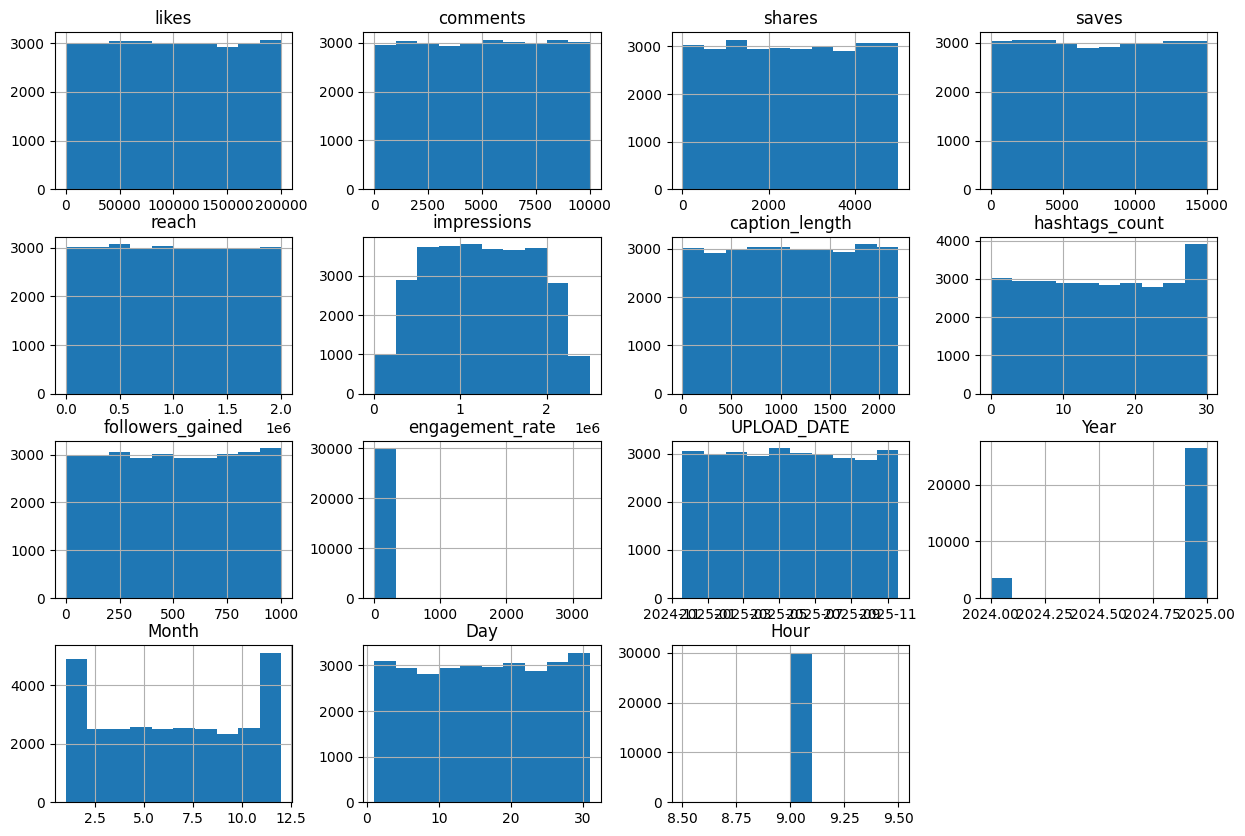

In [83]:
df.hist( figsize = ( 15, 10 ) );

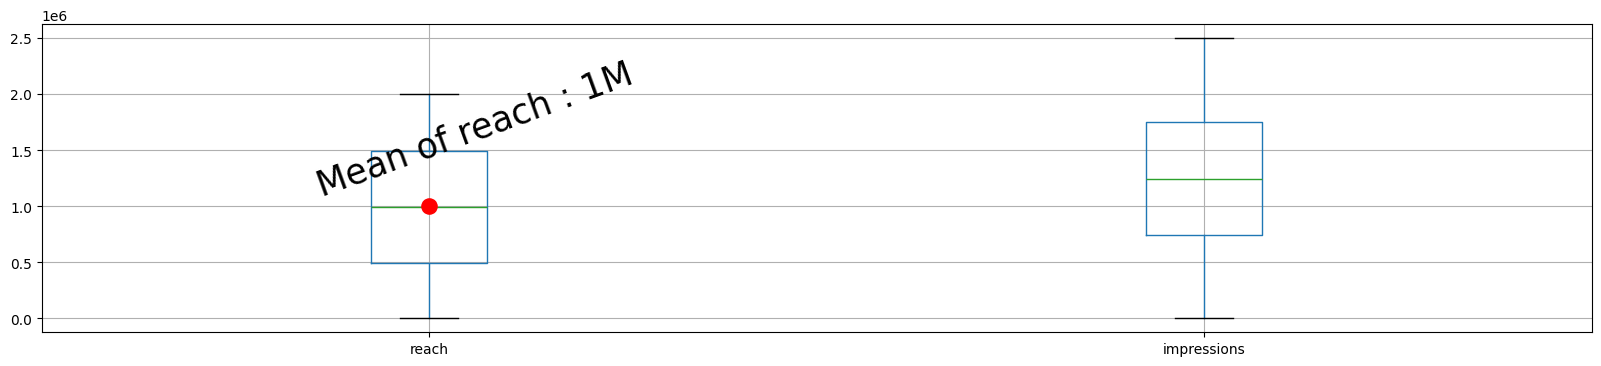

In [86]:
ax = df.boxplot( column= [ 'reach', 'impressions' ],figsize= ( 20, 4 ), grid= True, return_type= 'axes' );
ax.scatter(1, 1e6, color='red', s=120, zorder=5)
ax.annotate( text = f'Mean of reach : 1M', xy = ( 0.85, 1.1e6 ), rotation = 20, fontsize = 25 )
plt.show()

In [87]:
list( df.drop( columns = [ 'reach', 'impressions' ] ).columns )

['post_id',
 'media_type',
 'likes',
 'comments',
 'shares',
 'saves',
 'caption_length',
 'hashtags_count',
 'followers_gained',
 'traffic_source',
 'engagement_rate',
 'content_category',
 'UPLOAD_DATE',
 'Year',
 'Month',
 'Day',
 'Hour',
 'Day Name']

In [88]:
list( df.drop( columns = [ 'reach', 'impressions' ] ).columns )

['post_id',
 'media_type',
 'likes',
 'comments',
 'shares',
 'saves',
 'caption_length',
 'hashtags_count',
 'followers_gained',
 'traffic_source',
 'engagement_rate',
 'content_category',
 'UPLOAD_DATE',
 'Year',
 'Month',
 'Day',
 'Hour',
 'Day Name']

In [89]:
df

,post_id,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category,UPLOAD_DATE,Year,Month,Day,Hour,Day Name
0,IG0000001,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology,2024-11-30,2024,11,30,9,Saturday
1,IG0000002,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness,2025-08-15,2025,8,15,9,Friday
2,IG0000003,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty,2025-09-11,2025,9,11,9,Thursday
3,IG0000004,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music,2025-09-18,2025,9,18,9,Thursday
4,IG0000005,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology,2025-03-21,2025,3,21,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,IG0029995,Video,46046,8354,3847,11095,597992,820688,1254,18,124,Reels Feed,8.45,Travel,2024-12-18,2024,12,18,9,Wednesday
29995,IG0029996,Carousel,67711,3266,458,12380,1908094,2218288,1427,4,310,Hashtags,3.78,Beauty,2025-05-05,2025,5,5,9,Monday
29996,IG0029997,Photo,52326,7328,3687,7619,1984066,2447893,713,4,223,Explore,2.90,Photography,2025-05-26,2025,5,26,9,Monday
29997,IG0029998,Carousel,158113,5890,2573,6329,1984709,2001092,1341,22,978,Explore,8.64,Technology,2025-08-02,2025,8,2,9,Saturday


In [90]:
list( df.select_dtypes( exclude='object' ).drop( columns = [ 'reach', 'impressions' ] ).columns )

['likes',
 'comments',
 'shares',
 'saves',
 'caption_length',
 'hashtags_count',
 'followers_gained',
 'engagement_rate',
 'UPLOAD_DATE',
 'Year',
 'Month',
 'Day',
 'Hour']

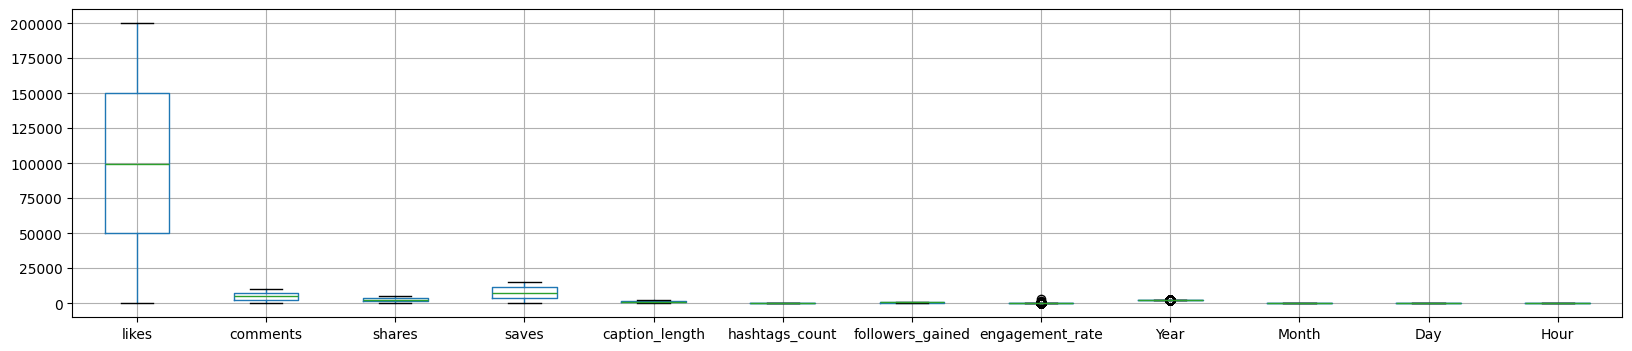

In [91]:
df.boxplot( column = list( df.select_dtypes( exclude=['object', 'datetime'] ).drop( columns = [ 'reach', 'impressions' ] ).columns ),figsize= ( 20, 4 ), grid= True );